<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
Авторы материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий и Data Scientist в Segmento Екатерина Демидова. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 2. Углубленные приемы pandas, collections, numpy</center>
## <center>Часть 0. Работа с векторами в библиотеке NumPy</center>

**Numpy** - это библиотека Python для вычислительно эффективных операций с многомерными массивами, предназначенная в основном для научных вычислений.

In [1]:
import numpy as np

In [2]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

Такой массив может содержать:
- значения физических величин в разые моменты времени при моделировании
- значения сигнала, измеренного прибором
- интенсивности пикселов 
- 3D координаты объектов, полученных, например, при МРТ
- ...


**Зачем NumPy:** Эффективность базовых операций 


In [3]:
L = range(1000000)

In [4]:
%timeit [i**2 for i in L]

366 ms ± 21.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
a = np.arange(1000000)

In [6]:
%timeit a**2

978 µs ± 166 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Интерактивная справка


In [7]:
?np.array

поиск в документации


In [9]:
np.lookfor('create array') 

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.asarray
    Convert the input to an array.
numpy.ndarray
    ndarray(shape, dtype=float, buffer=None, offset=0,
numpy.recarray
    Construct an ndarray that allows field access using attributes.
numpy.chararray
    chararray(shape, itemsize=1, unicode=Fa

In [10]:
np.con*?

#### Библиотеку принято импортировать так

In [11]:
import numpy as np

## Создание массивов

* **1-D**:


In [12]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [13]:
type(a)

numpy.ndarray

In [14]:
a.ndim

1

In [15]:
a.shape[0]

4

In [16]:
len(a)

4

* **2-D, 3-D, ...**:


In [17]:
b = np.array([[0, 1, 2], 
              [3, 4, 5]])    # 2 x 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [18]:
b.ndim

2

In [19]:
b.shape

(2, 3)

In [20]:
len(b)     # returns the size of the first dimension

2

In [21]:
c = np.array([[[1], [2]], 
              [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [22]:
c.shape

(2, 2, 1)

## Методы для создания массивов

На практике мы редко добавляем элементы по одному


- Равномерно распределенные элементы:


In [23]:
a = range(10)
type(a)

range

In [24]:
a = np.arange(10) # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
b = np.arange(1, 9, 2) # start, end (exclusive), step
b

array([1, 3, 5, 7])

In [26]:
c = np.arange(0.1, 1, 0.25)
c

array([0.1 , 0.35, 0.6 , 0.85])

- по числу элементов:


In [27]:
c = np.linspace(0, 1, 6)   # start, end, num-points
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [28]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([0. , 0.2, 0.4, 0.6, 0.8])

- Часто встречающиеся массивы:


In [29]:
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [30]:
b = np.zeros((2, 2))
b

array([[0., 0.],
       [0., 0.]])

In [31]:
c = np.eye(3)
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [32]:
d = np.diag([1, 2, 3, 4])
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [33]:
e = np.full((2,2), 7)
e

array([[7, 7],
       [7, 7]])

* `np.random` генерация случайных чисел (Mersenne Twister PRNG):

In [34]:
a = np.random.rand(4)       # uniform in [0, 1]
a  

array([0.85596453, 0.6833948 , 0.52548545, 0.15388996])

In [35]:
b = np.random.randn(4)      # Gaussian
b  

array([ 0.87002529, -1.82536862, -0.14410687, -0.35973876])

In [36]:
np.random.seed(1234)        # Setting the random seed

## Основные типы данных NumPy

Точка после числа означает, что это тип данных `float64`


In [37]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [38]:
b = np.array([1., 2., 3.])
b.dtype

dtype('float64')

Можно задать тип данных явно. По умолчанию - `float64`

In [39]:
c = np.array([1, 2, 3], dtype=float)
c.dtype

dtype('float64')

In [40]:
a = np.ones((3, 3))
a.dtype

dtype('float64')

Прочие типы данных:

- Комплексные числа


In [41]:
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype

dtype('complex128')

 - Bool


In [42]:
e = np.array([True, False, False, True])
e.dtype

dtype('bool')

- Строки

На строки память выделяется "жадно" - по максимальному числу литер в строке. 
В этом примере на каждую строку выделяется по 7 литер, и тип данных - 'S7'

In [43]:
f = np.array(['Bonjour_______', 'Hello', 'Hallo',])
f.dtype     # <--- strings containing max. 7 letters

dtype('<U14')

## Основы визуализации

Импортируем *Matplotlib*


In [44]:
import matplotlib.pyplot as plt  # the tidy way

 - Отображение одномерных массивов:


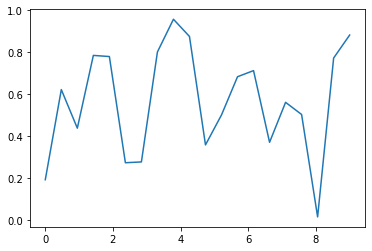

In [45]:
x = np.linspace(0, 9, 20)
y = np.random.rand(20)
plt.plot(x, y)       # line plot    
plt.show()           

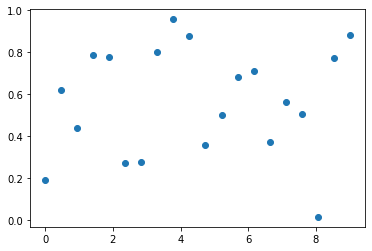

In [46]:
plt.plot(x, y, 'o')  # dot plot    

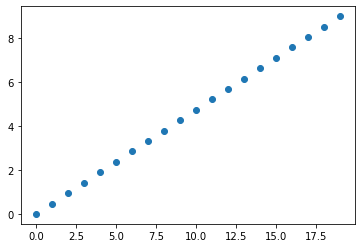

In [47]:
plt.plot(x, 'o')  # dot plot    

- Отображение двухмерных массивов (например, изображений):


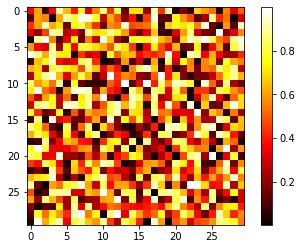

In [48]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()    

## Индексирование массивов и срезы

В целом так же, как со встроенными последовательностями Python (например, как со списками).


In [49]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
a[0], a[2], a[-1]

(0, 2, 9)

Работает и популярный в Python способ отражения массива:


In [51]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

Для многомерных массивов индексы - это кортежи целых чисел


In [52]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [53]:
a[1, 1]

1

In [54]:
a[2, 1] = 10 # third line, second column
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [55]:
a.T[0] = -1

In [56]:
a[:, 1]

array([ 0,  1, 10])

**Срезы**

In [57]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
a[2:9:3] # [start:end:step]

array([2, 5, 8])

Последний индекс не включается

In [59]:
a[:4]

array([0, 1, 2, 3])

По умолчанию \`start\` -  0,
\`end\` - индекс последнего элемента, \`step\` - 1:


In [60]:
a[1:3]

array([1, 2])

In [61]:
a[::2]

array([0, 2, 4, 6, 8])

In [62]:
a[1::2]

array([1, 3, 5, 7, 9])

In [63]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

Можно совмещать присваивание и срез:


In [64]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [65]:
b = np.arange(5)
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

## Пример. Матрица делителей

Отобразить матрицу, в которой вычеркивается **(x, y)**, если **y** делится на **x**.

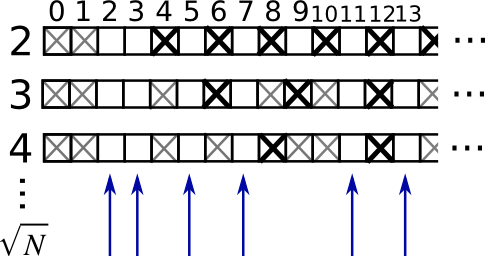

In [66]:
from IPython.display import Image
Image(filename='../../img/prime-sieve.png')

* Создадим массив `is_prime`, заполненний значениями True


In [67]:
is_prime = np.ones((100,), dtype=bool)
is_prime

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

* Вычеркнем 0 и 1 как не являющиеся простыми:


In [68]:
is_prime[:2] = 0
is_prime

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

* Для каждого натурального `j` начиная с  2, "вычеркнем" числа, ему кратные:


In [69]:
N_max = int(np.sqrt(len(is_prime)))
for j in range(2, N_max):
    is_prime[2*j::j] = False
    
is_prime

array([False, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False])

In [70]:
np.arange(100)[is_prime]

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97])

## Индексирование масками

In [71]:
np.random.seed(3)
a = np.random.random_integers(0, 20, 15)
a

/Users/i.marzharov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead
  


array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [72]:
(a % 3 == 0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False])

In [73]:
mask = (a % 3 == 0)
extract_from_a = a[mask] # or,  a[a%3==0]
extract_from_a           # extract a sub-array with the mask

array([ 3,  0,  9,  6,  0, 12])

Индексирование маской может быть очень полезным для присваивания значений части элементов массива:


In [74]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

### Индексирование массивом целых чисел

In [75]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [76]:
a[np.array([2, 3, 2, 4, 2])]  # note: [2, 3, 2, 4, 2] is a Python list

array([20, 30, 20, 40, 20])

In [77]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

In [78]:
a = np.arange(10, 20)
a

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [79]:
idx = np.array([[3, 4], [9, 7]])
display(idx.shape)
display(idx)

(2, 2)

array([[3, 4],
       [9, 7]])

In [80]:
a[idx]

array([[13, 14],
       [19, 17]])

### Изменение формы

In [81]:
a = np.floor(10*np.random.random((3,4)))
a

array([[6., 2., 6., 5.],
       [0., 5., 2., 4.],
       [2., 6., 4., 1.]])

In [82]:
a.T

array([[6., 0., 2.],
       [2., 5., 6.],
       [6., 2., 4.],
       [5., 4., 1.]])

In [83]:
a.reshape(4, -1)

array([[6., 2., 6.],
       [5., 0., 5.],
       [2., 4., 2.],
       [6., 4., 1.]])

In [84]:
a.resize(2, 6)
a

array([[6., 2., 6., 5., 0., 5.],
       [2., 4., 2., 6., 4., 1.]])

In [85]:
a.ravel()

array([6., 2., 6., 5., 0., 5., 2., 4., 2., 6., 4., 1.])

### Работа с несколькими массивами

Базовые операции

In [86]:
a = [1, 2, 3, 4]
b = [5, 6, 7, 8]
a + b # остальные не определены

[1, 2, 3, 4, 5, 6, 7, 8]

In [87]:
# для ndarray операции выполняются поэлементно
a = np.array(a)
b = np.array(b)

a + b, a - b, a * b, a / b

(array([ 6,  8, 10, 12]),
 array([-4, -4, -4, -4]),
 array([ 5, 12, 21, 32]),
 array([0.2       , 0.33333333, 0.42857143, 0.5       ]))

Произведение векторов и матриц

In [88]:
a.dot(b) # == np.dot(a, b)

70

In [89]:
x = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
x.dot(a)

array([30, 70])

In [90]:
x.dot(x.T)

array([[ 30,  70],
       [ 70, 174]])

Объединение массивов

In [91]:
a = np.floor(10*np.random.random((2,2)))
a

array([[5., 7.],
       [3., 2.]])

In [92]:
b = np.floor(10*np.random.random((2,2)))
b

array([[3., 9.],
       [9., 6.]])

In [93]:
np.vstack((a, b))

array([[5., 7.],
       [3., 2.],
       [3., 9.],
       [9., 6.]])

In [94]:
np.hstack((a, b))

array([[5., 7., 3., 9.],
       [3., 2., 9., 6.]])

In [95]:
np.concatenate((a, b), axis=0)

array([[5., 7.],
       [3., 2.],
       [3., 9.],
       [9., 6.]])

Broadcasting

In [96]:
a = np.floor(10*np.random.random((10,5)))
a

array([[9., 8., 3., 0., 6.],
       [5., 3., 2., 4., 4.],
       [2., 2., 4., 8., 5.],
       [2., 2., 4., 2., 2.],
       [5., 0., 4., 3., 7.],
       [7., 6., 6., 3., 6.],
       [3., 5., 3., 4., 0.],
       [2., 9., 2., 6., 6.],
       [7., 4., 5., 0., 0.],
       [1., 1., 1., 1., 5.]])

In [97]:
b = np.floor(10*np.random.random((5)))
b

array([1., 9., 6., 5., 7.])

In [98]:
a + b

array([[10., 17.,  9.,  5., 13.],
       [ 6., 12.,  8.,  9., 11.],
       [ 3., 11., 10., 13., 12.],
       [ 3., 11., 10.,  7.,  9.],
       [ 6.,  9., 10.,  8., 14.],
       [ 8., 15., 12.,  8., 13.],
       [ 4., 14.,  9.,  9.,  7.],
       [ 3., 18.,  8., 11., 13.],
       [ 8., 13., 11.,  5.,  7.],
       [ 2., 10.,  7.,  6., 12.]])

### Прочее

Максимум

In [99]:
a.max()

9.0

In [100]:
a.max(axis=0)

array([9., 9., 6., 8., 7.])

In [101]:
a.max(axis=1)

array([9., 5., 8., 4., 7., 7., 5., 9., 7., 5.])

Индекс максимума

In [102]:
a.argmax()

0

In [103]:
a

array([[9., 8., 3., 0., 6.],
       [5., 3., 2., 4., 4.],
       [2., 2., 4., 8., 5.],
       [2., 2., 4., 2., 2.],
       [5., 0., 4., 3., 7.],
       [7., 6., 6., 3., 6.],
       [3., 5., 3., 4., 0.],
       [2., 9., 2., 6., 6.],
       [7., 4., 5., 0., 0.],
       [1., 1., 1., 1., 5.]])

In [104]:
a.ravel()[a.argmax()]

9.0

In [105]:
a.argmax(axis=0)

array([0, 7, 5, 2, 4])

In [106]:
a.argmax(axis=1)

array([0, 0, 3, 2, 4, 0, 1, 1, 0, 4])

Суммирование

In [107]:
a.sum()

189.0

In [108]:
a.sum(axis=0)

array([43., 40., 34., 31., 41.])

In [109]:
a.sum(axis=1)

array([26., 18., 21., 12., 19., 28., 15., 25., 16.,  9.])

In [110]:
a / a.sum(axis=0)

array([[0.20930233, 0.2       , 0.08823529, 0.        , 0.14634146],
       [0.11627907, 0.075     , 0.05882353, 0.12903226, 0.09756098],
       [0.04651163, 0.05      , 0.11764706, 0.25806452, 0.12195122],
       [0.04651163, 0.05      , 0.11764706, 0.06451613, 0.04878049],
       [0.11627907, 0.        , 0.11764706, 0.09677419, 0.17073171],
       [0.1627907 , 0.15      , 0.17647059, 0.09677419, 0.14634146],
       [0.06976744, 0.125     , 0.08823529, 0.12903226, 0.        ],
       [0.04651163, 0.225     , 0.05882353, 0.19354839, 0.14634146],
       [0.1627907 , 0.1       , 0.14705882, 0.        , 0.        ],
       [0.02325581, 0.025     , 0.02941176, 0.03225806, 0.12195122]])

In [111]:
a

array([[9., 8., 3., 0., 6.],
       [5., 3., 2., 4., 4.],
       [2., 2., 4., 8., 5.],
       [2., 2., 4., 2., 2.],
       [5., 0., 4., 3., 7.],
       [7., 6., 6., 3., 6.],
       [3., 5., 3., 4., 0.],
       [2., 9., 2., 6., 6.],
       [7., 4., 5., 0., 0.],
       [1., 1., 1., 1., 5.]])

In [112]:
a[5:8, :]

array([[7., 6., 6., 3., 6.],
       [3., 5., 3., 4., 0.],
       [2., 9., 2., 6., 6.]])